In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

math = pd.read_csv('J:/stud_math.csv')

In [101]:
math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [102]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

At this point we've used the most common functions to get to know what we got in a dataset.

After this we probably should analyse every column of our dataframe to get a clouser look to maybe find some nans or typos

In [103]:
# got no idea what this column means so i've decided just to drop it
math.drop(['studytime, granular'], inplace=True, axis=1)

In [104]:
# just a rename for easier understaning of columns
math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
                'mother_education', 'father_education', 'mother_job', 'father_job',
                'reason', 'guardian', 'travel_time', 'study_time', 'failures',
                'school_support', 'family_support', 'paid', 'activities', 'nursery',
                'higher', 'internet', 'romantic_relations', 'family_relations',
                'free_time', 'friends_time', 'health', 'absences', 'math_score']

I've decided to write two fucnction to faster description of columns which's including histograms for numerical columns and values of categorial columns

In [105]:
def num_col(col):
    """function to describe columns with numerical values"""
    return col.hist(bins=col.nunique()), col.describe()

In [106]:
def obj_col(col):
    """"function to describe columns with numerical values"""""
    display(pd.DataFrame(col.value_counts()))
    pd.DataFrame(col).info()

Thought is IQR will be needed in defining which column got bursts

In [107]:
def iqr(col):
    """function to find IQR of a column"""
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    iqr = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25),
          '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(iqr),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))

In [108]:
def get_boxplot(column):
    """function to build boxplots of columns"""
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=column, y='math_score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [109]:
def get_stat_dif(column):
    """Student's T-test"""
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'math_score'],
                     math.loc[math.loc[:, column] == comb[1], 'math_score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [110]:
def continuous_fill(col):
    """function to fill numerical columns with mean value"""
    col.fillna(col.mean(), inplace=True)

In [111]:
def categorial_fill(col):
    """function to fill categorial columns with mode value"""
    col.fillna(col.mode()[0], inplace=True)

In [112]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   family_size         368 non-null    object 
 5   parents_status      350 non-null    object 
 6   mother_education    392 non-null    float64
 7   father_education    371 non-null    float64
 8   mother_job          376 non-null    object 
 9   father_job          359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  travel_time         367 non-null    float64
 13  study_time          388 non-null    float64
 14  failures            373 non-null    float64
 15  school_support      386 non-null    object 
 16  family_s

In [113]:
object_cols = ['school', 'sex', 'address', 'family_size', 'parents_status',
               'mother_job', 'father_job', 'reason', 'guardian', 'school_support',
               'family_support', 'paid', 'activities', 'nursery', 'higher', 'internet',
               'romantic_relations']
               
num_cols = ['age', 'mother_education', 'father_education', 'travel_time',
            'study_time', 'failures', 'family_relations', 'free_time',
            'friends_time', 'health', 'absences', 'math_score']

In [114]:
obj_col(math.school)

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [115]:
obj_col(math.sex)

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(<matplotlib.axes._subplots.AxesSubplot at 0x27ca53d3c40>,
 count    395.000000
 mean      16.696203
 std        1.276043
 min       15.000000
 25%       16.000000
 50%       17.000000
 75%       18.000000
 max       22.000000
 Name: age, dtype: float64)

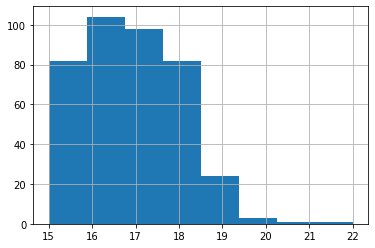

In [116]:
num_col(math.age)

In [117]:
categorial_fill(math.address)

In [118]:
obj_col(math.address)

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [119]:
categorial_fill(math.family_size)

In [120]:
obj_col(math.family_size)

,family_size
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [121]:
categorial_fill(math.parents_status)

In [122]:
obj_col(math.parents_status)

,parents_status
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parents_status  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [123]:
continuous_fill(math.mother_education)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca576f5b0>,
 count    395.000000
 mean       2.750000
 std        1.093938
 min        0.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        4.000000
 Name: mother_education, dtype: float64)

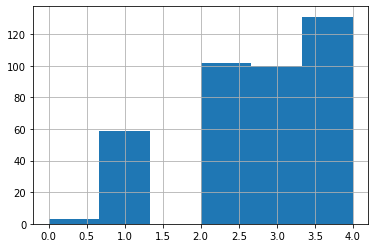

In [124]:
num_col(math.mother_education)

In [125]:
iqr(math.mother_education)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


(<matplotlib.axes._subplots.AxesSubplot at 0x27ca57eaeb0>,
 count    371.000000
 mean       2.614555
 std        2.228732
 min        0.000000
 25%        2.000000
 50%        2.000000
 75%        3.000000
 max       40.000000
 Name: father_education, dtype: float64)

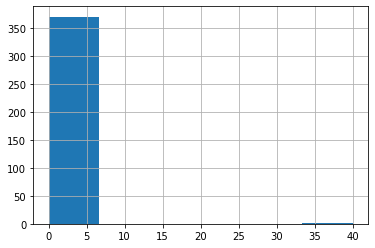

In [126]:
num_col(math.father_education)

In [127]:
iqr(math.father_education)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


At this point we see that this column should'nt have values like this and it's obviously a burst, so we're dropping this values

In [128]:
math = math.loc[math.father_education <= 4]

In [129]:
continuous_fill(math.father_education)

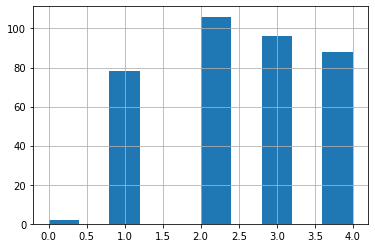

In [130]:
math.father_education.hist()

In [131]:
categorial_fill(math.mother_job)

In [132]:
obj_col(math.mother_job)

,mother_job
other,144
services,90
at_home,57
teacher,48
health,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [133]:
categorial_fill(math.father_job)

In [134]:
obj_col(math.father_job)

,father_job
other,223
services,94
teacher,26
at_home,14
health,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [135]:
categorial_fill(math.reason)

In [136]:
obj_col(math.reason)

,reason
course,144
reputation,98
home,96
other,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [137]:
categorial_fill(math.guardian)

In [138]:
obj_col(math.guardian)

,guardian
mother,266
father,78
other,26


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


(<matplotlib.axes._subplots.AxesSubplot at 0x27ca58c4760>,
 count    345.000000
 mean       1.449275
 std        0.701664
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max        4.000000
 Name: travel_time, dtype: float64)

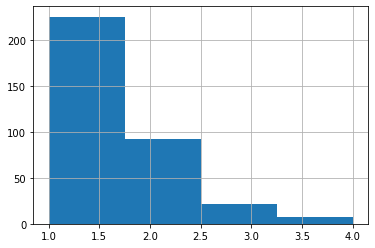

In [139]:
num_col(math.travel_time)

In [140]:
categorial_fill(math.travel_time)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca592aee0>,
 count    370.000000
 mean       1.418919
 std        0.686824
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max        4.000000
 Name: travel_time, dtype: float64)

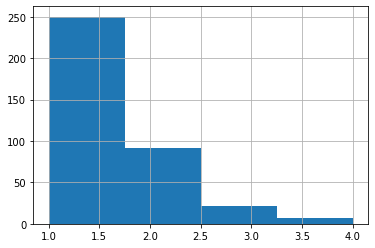

In [141]:
num_col(math.travel_time)

In [142]:
categorial_fill(math.study_time)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca598b2e0>,
 count    370.000000
 mean       2.027027
 std        0.832487
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        2.000000
 max        4.000000
 Name: study_time, dtype: float64)

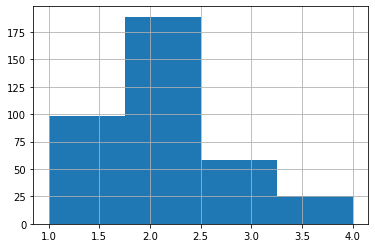

In [143]:
num_col(math.study_time)

In [144]:
categorial_fill(math.failures)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca58a47f0>,
 count    370.000000
 mean       0.318919
 std        0.733199
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        3.000000
 Name: failures, dtype: float64)

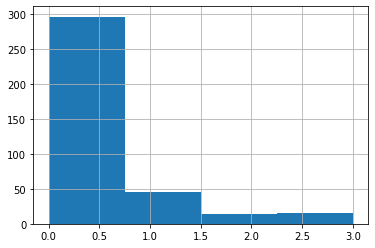

In [145]:
num_col(math.failures)

In [146]:
categorial_fill(math.school_support)

In [147]:
obj_col(math.school_support)

,school_support
no,323
yes,47


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school_support  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [148]:
categorial_fill(math.family_support)

In [149]:
obj_col(math.family_support)

,family_support
yes,239
no,131


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family_support  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [150]:
categorial_fill(math.paid)

In [151]:
obj_col(math.paid)

,paid
no,225
yes,145


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [152]:
categorial_fill(math.activities)

In [153]:
obj_col(math.activities)

,activities
yes,194
no,176


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [154]:
categorial_fill(math.nursery)

In [155]:
obj_col(math.nursery)

,nursery
yes,295
no,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [156]:
categorial_fill(math.higher)

In [157]:
obj_col(math.higher)

,higher
yes,351
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [158]:
categorial_fill(math.internet)

In [159]:
obj_col(math.internet)

,internet
yes,316
no,54


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [160]:
categorial_fill(math.romantic_relations)

In [161]:
obj_col(math.romantic_relations)

,romantic_relations
no,254
yes,116


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   romantic_relations  370 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


(<matplotlib.axes._subplots.AxesSubplot at 0x27ca5a41250>,
 count    346.000000
 mean       3.936416
 std        0.939629
 min       -1.000000
 25%        4.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: family_relations, dtype: float64)

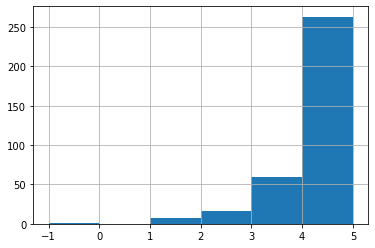

In [162]:
num_col(math.family_relations)

At this point we see that this column should'nt have values like this and it's obviously a burst, so we're dropping this values

In [163]:
math = math.loc[math.family_relations >= 1]

In [164]:
categorial_fill(math.family_relations)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca5a4d1c0>,
 count    345.000000
 mean       3.950725
 std        0.902455
 min        1.000000
 25%        4.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: family_relations, dtype: float64)

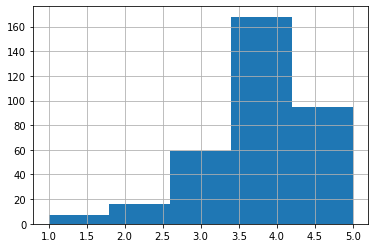

In [165]:
num_col(math.family_relations)

In [166]:
categorial_fill(math.free_time)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca508fd90>,
 count    345.000000
 mean       3.223188
 std        0.990969
 min        1.000000
 25%        3.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: free_time, dtype: float64)

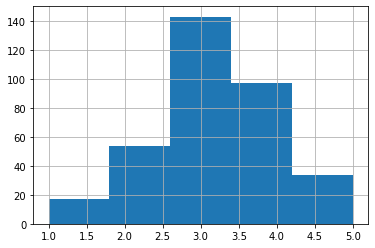

In [167]:
num_col(math.free_time)

In [168]:
categorial_fill(math.friends_time)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca6affb20>,
 count    345.000000
 mean       3.104348
 std        1.092048
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: friends_time, dtype: float64)

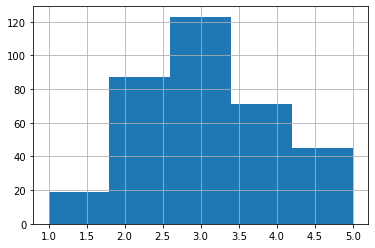

In [169]:
num_col(math.friends_time)

In [170]:
categorial_fill(math.health)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca6bbcbe0>,
 count    345.000000
 mean       3.527536
 std        1.391407
 min        1.000000
 25%        3.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: health, dtype: float64)

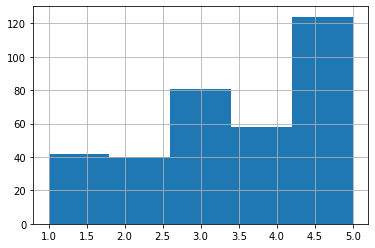

In [171]:
num_col(math.health)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca6c22880>,
 count    333.000000
 mean       7.315315
 std       24.755302
 min        0.000000
 25%        0.000000
 50%        4.000000
 75%        8.000000
 max      385.000000
 Name: absences, dtype: float64)

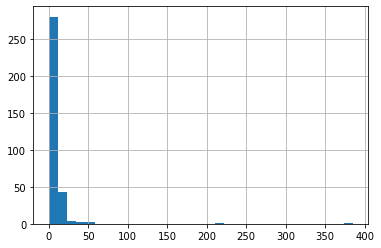

In [172]:
num_col(math.absences)

It was a hard point and I still don't know for sure but I've decided to drop values over 100 cause of my logic it's too hight values that won't show the true picture 

In [173]:
iqr(math.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [174]:
math = math.loc[math.absences <= 100]

In [175]:
continuous_fill(math.absences)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca6cd7af0>,
 count    331.000000
 mean       5.555891
 std        7.363241
 min        0.000000
 25%        0.000000
 50%        4.000000
 75%        8.000000
 max       56.000000
 Name: absences, dtype: float64)

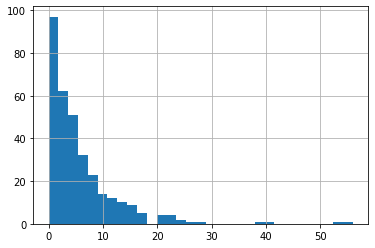

In [176]:
num_col(math.absences)

(<matplotlib.axes._subplots.AxesSubplot at 0x27ca6d71d00>,
 count    326.000000
 mean      52.147239
 std       22.401712
 min        0.000000
 25%       41.250000
 50%       55.000000
 75%       65.000000
 max      100.000000
 Name: math_score, dtype: float64)

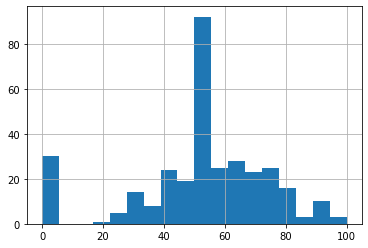

In [177]:
num_col(math.math_score)

In [178]:
iqr(math.math_score)

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,  Границы выбросов: [5.625, 100.625].


There i've decided not to cut '0' values cause i think our future model should have this values which is including a chance of zero result (by any reason)

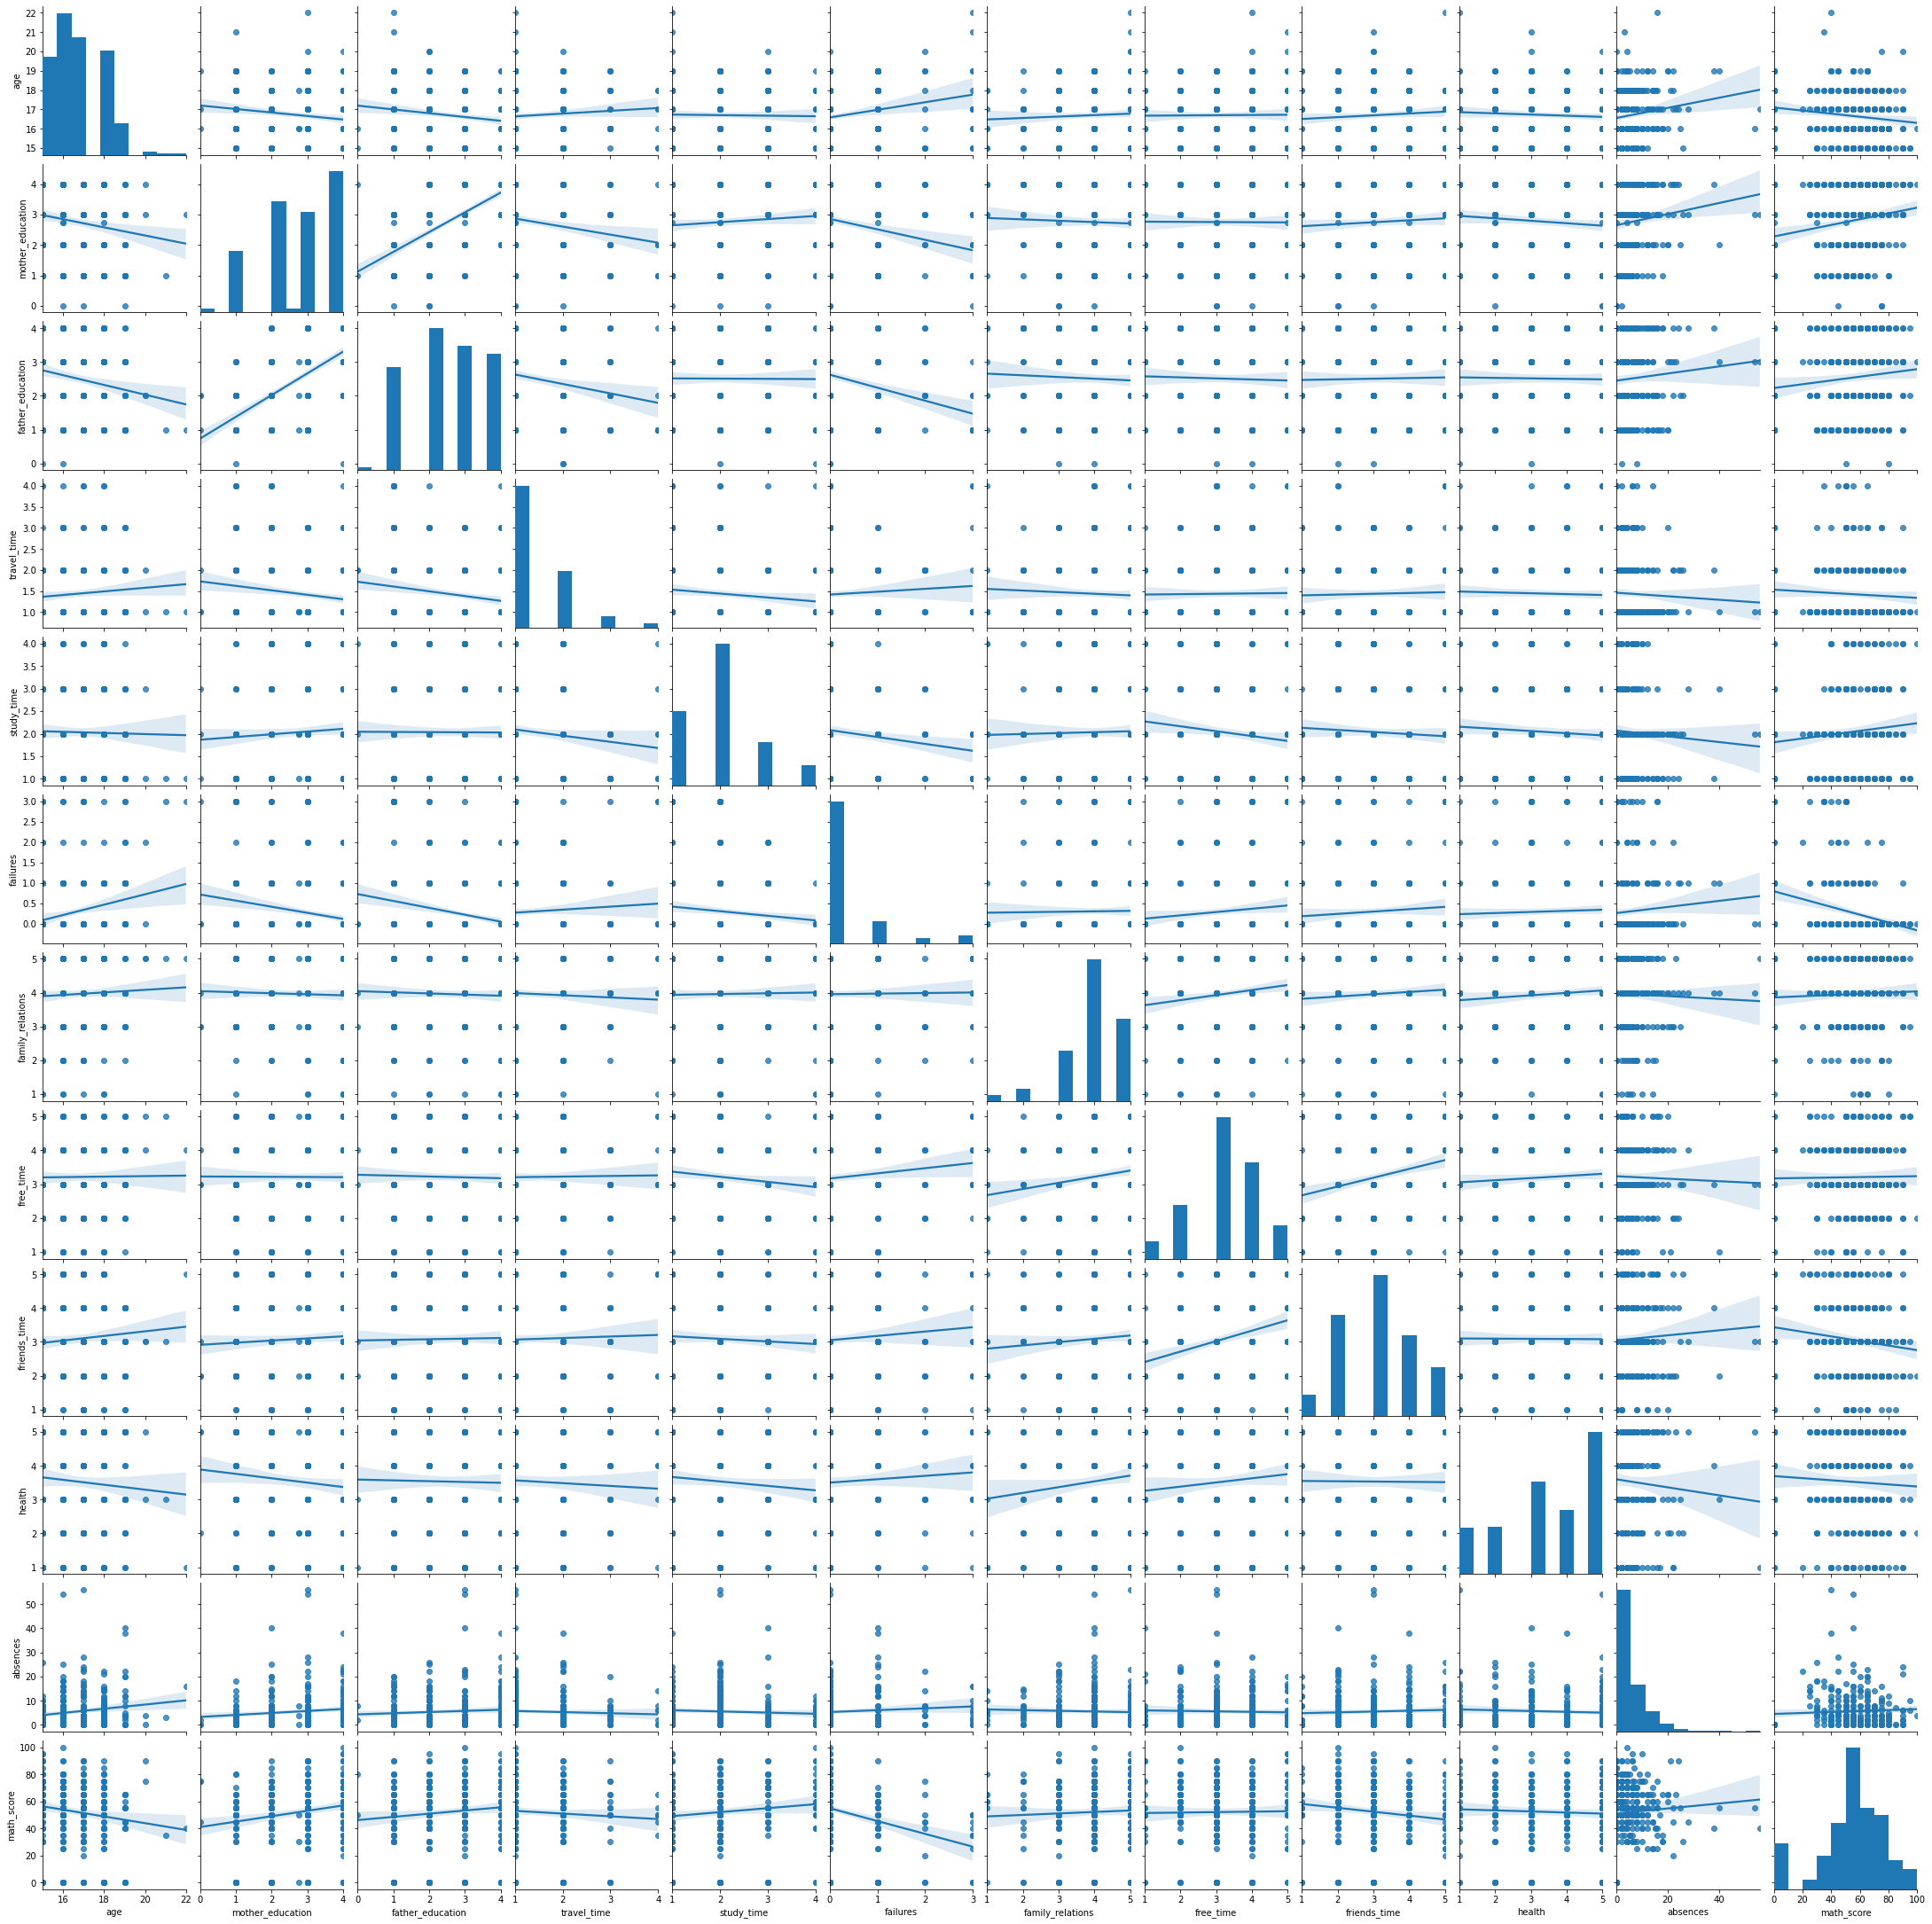

In [179]:
sns.pairplot(math, kind='reg')

Plots did'nt really hepled me, cause i did'nt understood meanings almost all of plots

In [180]:
math.corr()

,age,mother_education,father_education,travel_time,study_time,failures,family_relations,free_time,friends_time,health,absences,math_score
age,1.000000,-0.155840,-0.168238,0.078357,-0.018997,0.223315,0.053071,0.009614,0.080313,-0.066527,0.150496,-0.140704
mother_education,-0.155840,1.000000,0.647048,-0.167665,0.078527,-0.226833,-0.037401,-0.005463,0.064240,-0.102520,0.122018,0.194702
father_education,-0.168238,0.647048,1.000000,-0.178191,-0.005215,-0.254818,-0.041272,-0.028059,0.018689,-0.018661,0.070776,0.114783
travel_time,0.078357,-0.167665,-0.178191,1.000000,-0.112792,0.070939,-0.049801,0.012711,0.029389,-0.041118,-0.044166,-0.062993
study_time,-0.018997,0.078527,-0.005215,-0.112792,1.000000,-0.131129,0.021642,-0.127895,-0.059655,-0.079831,-0.055207,0.111526
failures,0.223315,-0.226833,-0.254818,0.070939,-0.131129,1.000000,0.013798,0.111196,0.085872,0.052250,0.075694,-0.301175
family_relations,0.053071,-0.037401,-0.041272,-0.049801,0.021642,0.013798,1.000000,0.164967,0.081147,0.111070,-0.034116,0.044338
free_time,0.009614,-0.005463,-0.028059,0.012711,-0.127895,0.111196,0.164967,1.000000,0.284030,0.088392,-0.027117,0.014663
friends_time,0.080313,0.064240,0.018689,0.029389,-0.059655,0.085872,0.081147,0.284030,1.000000,-0.006896,0.050153,-0.139746
health,-0.066527,-0.102520,-0.018661,-0.041118,-0.079831,0.052250,0.111070,0.088392,-0.006896,1.000000,-0.062481,-0.049560


At this point i've decided to take such columns as: age, higher, study time and failures cause of their pretty high corr rate to math score out of all columns

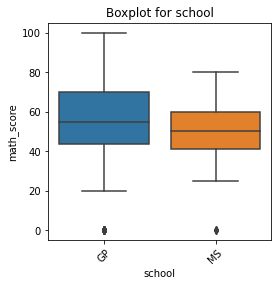

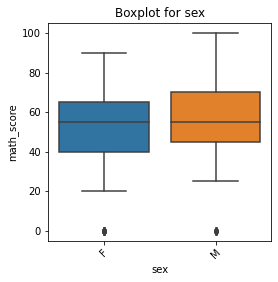

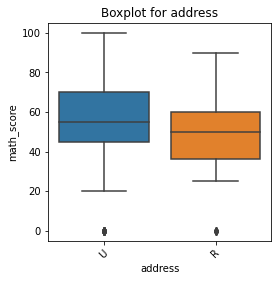

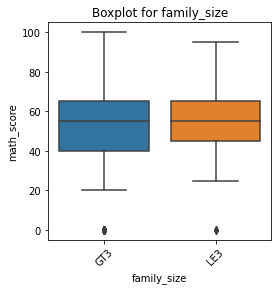

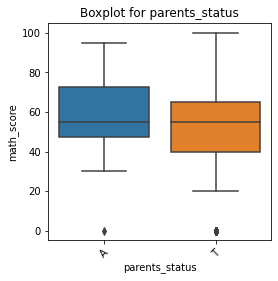

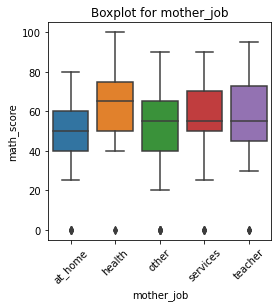

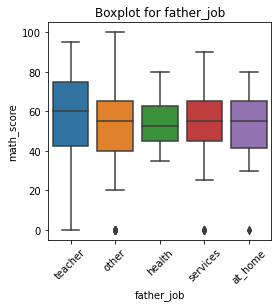

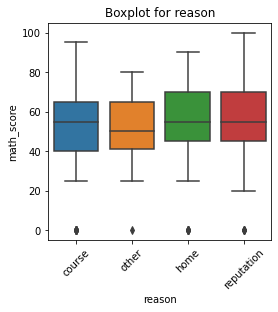

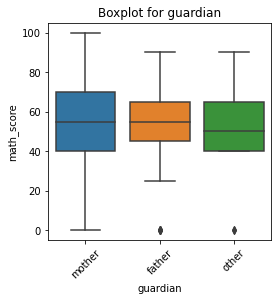

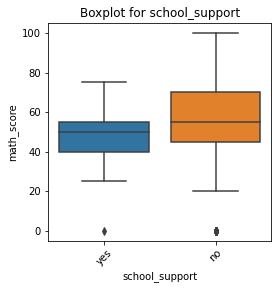

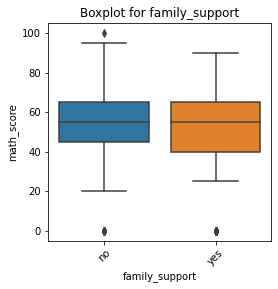

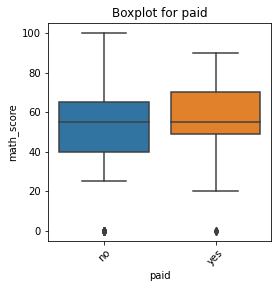

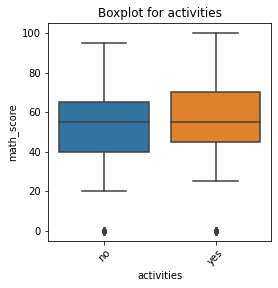

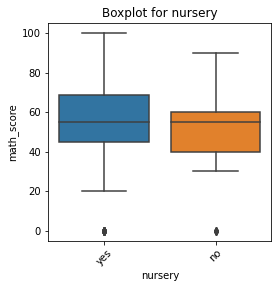

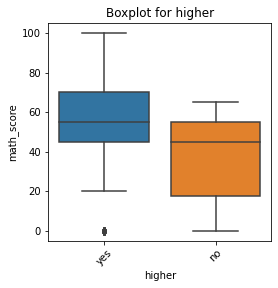

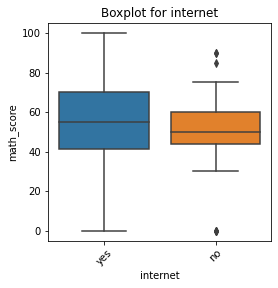

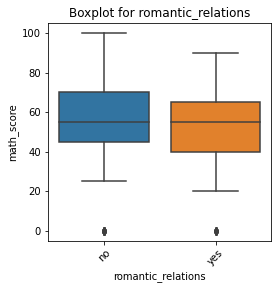

In [181]:
for col in object_cols:
    get_boxplot(col)

In [182]:
for col in math.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки friends_time
Найдены статистически значимые различия для колонки math_score


J:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
J:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
J:\anaconda\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


By Student's T-tests and reading of boxplots  i've added to valuable columns some of categorial columns for our future model as: mother's education, mother's job, friends time

To summarize work's done i got some points:
1. We got almost clean dataset with only small lack of values in some columns
2. Some columns got bursts (father's education, family realtions),which i've decided to clean and some bursts (from iqr theory state) i've decided not to clean cause in my opinion it's a valuable meanings 
3. Most valuable columns to analize in our model in my opinion is in math_for_model variable.

In [183]:
math_for_model = math.loc[:, ['age', 'mother_education',
                              'mother_job', 'higher', 'study_time', 'friends_time', 'failures']]

In [184]:
math_for_model.head(10)

,age,mother_education,mother_job,higher,study_time,friends_time,failures
0,18,4.0,at_home,yes,2.0,4.0,0.0
1,17,1.0,at_home,yes,2.0,3.0,0.0
2,15,1.0,at_home,yes,2.0,2.0,3.0
3,15,4.0,health,yes,3.0,2.0,0.0
4,16,3.0,other,yes,2.0,2.0,0.0
5,16,4.0,services,yes,2.0,2.0,0.0
6,16,2.0,other,yes,2.0,4.0,0.0
7,17,4.0,other,yes,2.0,4.0,0.0
9,15,3.0,other,yes,2.0,1.0,0.0
10,15,4.0,teacher,yes,2.0,3.0,0.0
